In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclass-iot-a/sample_submission.csv
/kaggle/input/binaryclass-iot-a/train.csv
/kaggle/input/binaryclass-iot-a/test.csv


In [142]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [143]:
train_df = pd.read_csv('/kaggle/input/binaryclass-iot-a/train.csv')
test_df = pd.read_csv('/kaggle/input/binaryclass-iot-a/test.csv')

In [144]:
X = train_df.drop(columns=["id", "smoking"])  # Drop ID and target columns
y = train_df["smoking"]

In [145]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [146]:
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Use KNN imputer instead of median
    ('scaler', StandardScaler())
])

In [147]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ]
)

In [148]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=123, penalty='l1', solver='saga', max_iter=1000))
])

In [149]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=123)


In [150]:
model_pipeline.fit(X_train_split, y_train_split)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=123, solver='saga'))])

In [151]:
y_pred = model_pipeline.predict(X_val_split)

In [152]:
accuracy = accuracy_score(y_val_split, y_pred)
conf_matrix = confusion_matrix(y_val_split, y_pred)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
precision = precision_score(y_val_split, y_pred, average='binary')
recall = recall_score(y_val_split, y_pred, average='binary')
f1 = f1_score(y_val_split, y_pred, average='binary')

In [153]:
print("Accuracy on validation set:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Normalized Confusion Matrix:\n", normalized_conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_val_split, y_pred))

Accuracy on validation set: 0.783
Confusion Matrix:
 [[1571  347]
 [ 304  778]]
Normalized Confusion Matrix:
 [[0.81908238 0.18091762]
 [0.28096118 0.71903882]]
Precision: 0.6915555555555556
Recall: 0.7190388170055453
F1 Score: 0.7050294517444495
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1918
         1.0       0.69      0.72      0.71      1082

    accuracy                           0.78      3000
   macro avg       0.76      0.77      0.77      3000
weighted avg       0.79      0.78      0.78      3000



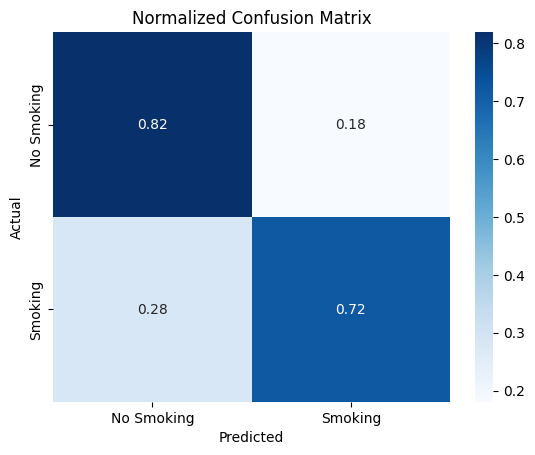

In [154]:
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Smoking', 'Smoking'], yticklabels=['No Smoking', 'Smoking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [155]:
X_test = test_df.drop(columns=["id"])
test_ids = test_df["id"]

In [156]:
test_probabilities = model_pipeline.predict_proba(test_df)[:, 1]

In [160]:
submission = pd.DataFrame({"id": test_ids, "smoking": test_probabilities})
submission_file_path = "/kaggle/working/submission.csv"
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created and saved to: {submission_file_path}")

Submission file created and saved to: /kaggle/working/submission.csv


In [159]:
training_accuracy = model_pipeline.score(X_train, y_train)
print("Accuracy on training set:", training_accuracy)

Accuracy on training set: 0.7864
